## Foundation of Statistics - Exercise

**Author** : M. Haries Ramdhani<br/>
**Date** : Oct 25th 2019

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

pd.set_option('display.max_columns', 1000)

In [115]:
# Import the data
df = pd.read_excel("data loan.xlsx")

df = df.set_index("Kontrak")

In [116]:
print(f"The initial data size is {df.shape[0]} rows and {df.shape[1]} columns")

The initial data size is 28293 rows and 22 columns


In [117]:
# Sample 80% of the data
df = df.sample(int(df.shape[0] * 0.8), random_state=42).reset_index(drop=True)

In [118]:
print(f"The data size after simple random sampling is performed became {df.shape[0]} rows and {df.shape[1]} columns")

The data size after simple random sampling is performed became 22634 rows and 22 columns


In [119]:
# Preview of the first five data
df.head(5)

,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,Age,Interest_Rate,Income,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
0,MINIBUS,Karyawan,Jawa,36,0 - 30 hari,Tidak,265.751998,86.82,258.4,51,12.04,15,51.68,224.34,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,6.83,Jasa & Perdagangan
1,OTHERS,Wiraswasta,Jawa,36,0 - 30 hari,Tidak,183.455999,66.72,241.9,45,9.02,20,101.60,161.41,Private,Sarjana,Tidak ada,MENIKAH,Laki-laki,Ya,3.82,Jasa & Perdagangan
2,MINIBUS,Wiraswasta,Jawa,60,> 150 hari,Ya,222.298162,81.08,194.1,40,14.53,20,48.53,157.38,Private,Others,Ada,OTHERS,Perempuan,Tidak,3.99,Others
3,OTHERS,Karyawan,Sumatera,24,0 - 30 hari,Tidak,244.732836,57.02,388.4,41,10.67,15,188.80,221.48,Private,Sarjana,Tidak ada,MENIKAH,Perempuan,Tidak,8.79,Others
4,MINIBUS,Karyawan,Jawa,36,> 150 hari,Ya,159.217501,70.15,180.2,58,9.97,14,69.31,126.41,Private,Others,Tidak ada,MENIKAH,Perempuan,Ya,8.61,Jasa & Perdagangan


In [120]:
# See the 
gender_dict = {
    "Laki-laki" : "male",
    "Perempuan" : "female"
}

genders = df["Gender"].value_counts().index
values = df["Gender"].value_counts().values

In [121]:
for i in range(len(genders)):
    print(f"There are {values[i]} {gender_dict[genders[i]]} ({round(values[i]/sum(values) * 100, 2)}%) in the data set")

There are 16732 male (73.92%) in the data set
There are 5902 female (26.08%) in the data set


Looking at this data we know that we have more male customers than female customers

In [122]:
# Querying the highest 10 customers in the data set
highest_10_AF = df.sort_values(by="AF", ascending=False).head(10)
highest_10_AF

,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,Age,Interest_Rate,Income,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
11391,OTHERS,Lainnya,Jawa,60,>30 - 90 hari,Tidak,1854.341300,87.03,1508.40,33,15.09,30,301.68,1312.81,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Tidak,5.31,Others
1979,OTHERS,Wiraswasta,Jawa,48,0 - 30 hari,Tidak,1363.905573,76.76,1448.40,47,10.89,25,385.62,1111.76,Private,Sarjana,Ada,MENIKAH,Laki-laki,Tidak,5.31,Others
609,OTHERS,Wiraswasta,Jawa,24,0 - 30 hari,Tidak,1085.657160,70.00,1433.40,34,8.37,250,430.02,1003.38,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Tidak,5.90,Others
7748,OTHERS,Lainnya,Jawa,36,>120 - 150 hari,Ya,1099.220215,66.18,1463.40,38,8.92,80,567.37,968.48,Private,Sarjana,Ada,OTHERS,Laki-laki,Tidak,5.90,Others
20429,OTHERS,Karyawan,Jawa,48,0 - 30 hari,Tidak,1144.655991,86.77,994.90,45,15.29,27,198.98,863.24,Private,Sarjana,Ada,MENIKAH,Laki-laki,Tidak,3.45,Others
7838,OTHERS,Wiraswasta,Jawa,48,0 - 30 hari,Tidak,1133.375986,86.76,989.60,50,14.35,50,197.95,858.61,Private,Sarjana,Tidak ada,MENIKAH,Perempuan,Tidak,4.42,Others
21423,OTHERS,Wiraswasta,Jawa,24,0 - 30 hari,Tidak,920.135996,79.85,1054.70,49,9.43,50,263.68,842.15,Private,Sarjana,Ada,MENIKAH,Laki-laki,Ya,3.61,Jasa & Perdagangan
12420,OTHERS,Wiraswasta,Jawa,60,0 - 30 hari,Tidak,1058.880000,77.08,1050.55,44,11.52,100,315.17,809.81,Private,Sarjana,Tidak ada,MENIKAH,Laki-laki,Ya,3.61,Jasa & Perdagangan
3174,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,839.632751,66.54,1215.70,57,8.23,200,406.81,808.89,Private,Others,Ada,MENIKAH,Laki-laki,Tidak,5.47,Jasa & Perdagangan
6244,OTHERS,Lainnya,Jawa,36,0 - 30 hari,Tidak,924.479995,77.94,1033.65,43,9.72,100,262.03,805.58,Private,Others,Tidak ada,OTHERS,Laki-laki,Ya,4.37,Others


In [126]:
highest_10_AF_NPF_Yes_CNT = sum(highest_10_AF["NPF"] == "Ya")

In [127]:
print(f"There are {highest_10_AF_NPF_Yes_CNT} clients in the Top 10 clients with the highest amount of finance who are having a bad risk")

There are 1 clients in the Top 10 clients with the highest amount of finance who are having a bad risk


In [128]:
numeric_data = df.select_dtypes(include=[np.number]).columns
categorical_data = df.select_dtypes(exclude=[np.number]).columns

In [129]:
print(f"In the dataset, there are {len(numeric_data)} numeric columns and {len(categorical_data)} categorical columns")

In the dataset, there are 10 numeric columns and 12 categorical columns


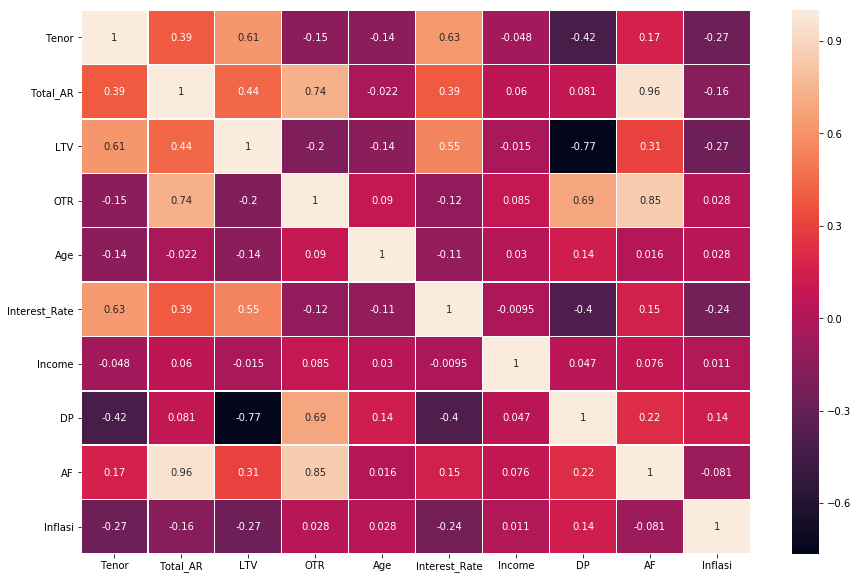

In [130]:
# See the correlation between each variables
f, ax = plt.subplots(figsize=(15, 10))

correlations = df.corr()
sns.heatmap(correlations, annot=True, linewidths=.5, ax=ax)
plt.show()

In [131]:
print("COUNTING OUTLIERS BASED ON WHAT I LEARNED TODAY")
print("-----------------------------------------------\n")
print("[BASED ON IQR]")
for data in numeric_data:
    q1 = df[data].quantile(0.25)
    q3 = df[data].quantile(0.75)
    iqr = q3 - q1
    
    outlier_cnt = df[data][(df[data] < (q1 - 1.5 * iqr)) | (df[data] > (q3 + 1.5 * iqr))].shape[0]  
    
    print(f"Total outliers for the column {data} is {outlier_cnt}")

print("\n")
print("[BASED ON SD > 3]")
for data in numeric_data:
    standardized = (df[data] - df[data].mean()) / df[data].std()
    outlier_cnt = standardized[abs(standardized) > 3].shape[0]
    
    print(f"Total outliers for the column {data} is {outlier_cnt}")

COUNTING OUTLIERS BASED ON WHAT I LEARNED TODAY
-----------------------------------------------

[BASED ON IQR]
Total outliers for the column Tenor is 0
Total outliers for the column Total_AR is 391
Total outliers for the column LTV is 2682
Total outliers for the column OTR is 1294
Total outliers for the column Age is 36
Total outliers for the column Interest_Rate is 161
Total outliers for the column Income is 1634
Total outliers for the column DP is 1797
Total outliers for the column AF is 721
Total outliers for the column Inflasi is 0


[BASED ON SD > 3]
Total outliers for the column Tenor is 0
Total outliers for the column Total_AR is 190
Total outliers for the column LTV is 498
Total outliers for the column OTR is 376
Total outliers for the column Age is 36
Total outliers for the column Interest_Rate is 146
Total outliers for the column Income is 74
Total outliers for the column DP is 466
Total outliers for the column AF is 300
Total outliers for the column Inflasi is 0


In [137]:
# Standardized the numerical column
for data in numeric_data:
    df[data] = (df[data] - df[data].mean()) / df[data].std()

In [147]:
df_dummies = pd.get_dummies(df[["Area"]]).drop("Area_Others", axis=1)

For this task I used the duration, age, two dummy variables to predict the value of the total_AR

In [154]:
X = pd.concat([df[["Tenor", "Age"]], df_dummies], axis=1)
y = df["Total_AR"]

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [157]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
regressor.coef_

array([ 0.47574462,  0.03473403, -0.21329039, -0.0740906 ])

In [171]:
print("The equation for the linear regression is :")
print(f"y = {round(regressor.intercept_, 3)} + {round(regressor.coef_[0], 3)} X1 + {round(regressor.coef_[1], 3)} X2 + {round(regressor.coef_[2], 3)} X3 + + {round(regressor.coef_[3], 3)} X4")

The equation for the linear regression is :
y = 0.144 + 0.476 X1 + 0.035 X2 + -0.213 X3 + + -0.074 X4


In [167]:
y_pred = regressor.predict(X)np.mean_squared_error(y, y_pred)

0.77171360779753606

In [173]:
y_pred = regressor.predict(X)
rmse = math.sqrt(mean_squared_error(y, y_pred))
print(f"The RMSE fo the linear regression is {rmse}")

The RMSE fo the linear regression is 0.8784723147587157
